# Project 3: NLP Business Case - Automated Customer Reviews
## Phase 1: Data Exploration & Initial Analysis
---
**Dataset:** Datafiniti Amazon Consumer Reviews of Amazon Products

**Goal:** Understand the data structure, quality, and distributions before building models for:
1. Review Classification (sentiment)
2. Product Category Clustering
3. Review Summarization

## 1. Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print('Libraries loaded successfully')

Libraries loaded successfully


## 2. Load Data

The Kaggle dataset has multiple CSV files. Update the path below to point to your downloaded file(s).

If you have multiple CSVs (e.g. May19 and another), we can concatenate them.

In [2]:
# UPDATE THIS PATH to where you saved the CSV file(s)
# Option A: Single file
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', low_memory=False)

# Option B: If you have multiple CSVs, uncomment below:
# df1 = pd.read_csv('file1.csv', low_memory=False)
# df2 = pd.read_csv('file2.csv', low_memory=False)
# df = pd.concat([df1, df2], ignore_index=True)

print(f'Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns')

Dataset loaded: 28,332 rows, 24 columns


## 3. First Look at the Data

In [3]:
# First 5 rows
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put ...,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9P0O/,Bulk is always the less expensive way to go for products like these,... always the less expensive way to go for products like,ByMG,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9P0O/,Well they are not Duracell but for the price i am happy.,... are not Duracell but for the price i am happy.,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9P0O/,Seem to work as well as name brand batteries at a much better price,... as well as name brand batteries at a much better,Bymark sexson,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Ca

In [4]:
# Column names and data types
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  str    
 1   dateAdded            28332 non-null  str    
 2   dateUpdated          28332 non-null  str    
 3   name                 28332 non-null  str    
 4   asins                28332 non-null  str    
 5   brand                28332 non-null  str    
 6   categories           28332 non-null  str    
 7   primaryCategories    28332 non-null  str    
 8   imageURLs            28332 non-null  str    
 9   keys                 28332 non-null  str    
 10  manufacturer         28332 non-null  str    
 11  manufacturerNumber   28332 non-null  str    
 12  reviews.date         28332 non-null  str    
 13  reviews.dateSeen     28332 non-null  str    
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null  object 
 1

In [5]:
# Statistical summary of numeric columns
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [6]:
# All column names (useful for identifying relevant fields)
print('Columns:')
for i, col in enumerate(df.columns):
    print(f'  {i}: {col} ({df[col].dtype})')

Columns:
  0: id (str)
  1: dateAdded (str)
  2: dateUpdated (str)
  3: name (str)
  4: asins (str)
  5: brand (str)
  6: categories (str)
  7: primaryCategories (str)
  8: imageURLs (str)
  9: keys (str)
  10: manufacturer (str)
  11: manufacturerNumber (str)
  12: reviews.date (str)
  13: reviews.dateSeen (str)
  14: reviews.didPurchase (object)
  15: reviews.doRecommend (object)
  16: reviews.id (float64)
  17: reviews.numHelpful (float64)
  18: reviews.rating (int64)
  19: reviews.sourceURLs (str)
  20: reviews.text (str)
  21: reviews.title (str)
  22: reviews.username (str)
  23: sourceURLs (str)


## 4. Missing Values Analysis

In [7]:
# Missing values count and percentage
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_pct': (df.isnull().sum() / len(df) * 100).round(2)
})
missing = missing.sort_values('missing_pct', ascending=False)
print('Missing values by column:')
missing[missing['missing_count'] > 0]

Missing values by column:


,missing_count,missing_pct
reviews.didPurchase,28323,99.97
reviews.id,28291,99.86
reviews.doRecommend,12246,43.22
reviews.numHelpful,12217,43.12
reviews.username,5,0.02


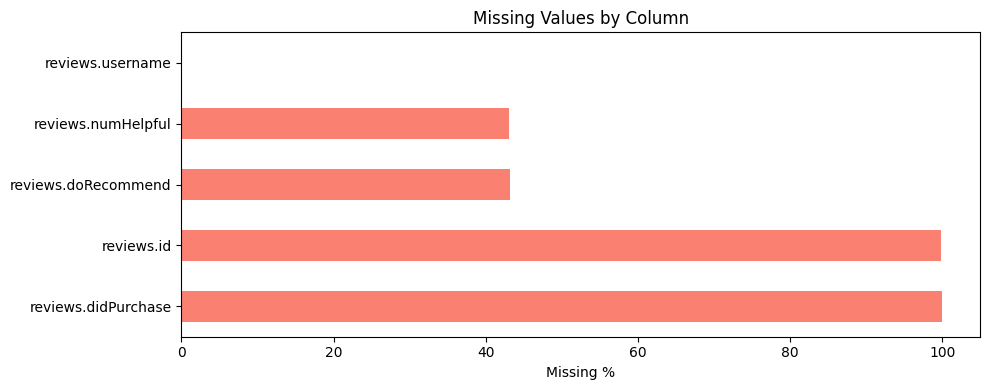

In [8]:
# Visualize missing values (only columns with missing data)
missing_cols = missing[missing['missing_count'] > 0]
if len(missing_cols) > 0:
    fig, ax = plt.subplots(figsize=(10, max(4, len(missing_cols) * 0.4)))
    missing_cols['missing_pct'].plot(kind='barh', ax=ax, color='salmon')
    ax.set_xlabel('Missing %')
    ax.set_title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print('No missing values!')

## 5. Duplicates Check

In [9]:
# Full row duplicates
n_dupes = df.duplicated().sum()
print(f'Full row duplicates: {n_dupes:,} ({n_dupes/len(df)*100:.2f}%)')

# Check for duplicate reviews (same review text)
# Adjust column name if needed after seeing data
text_col = [c for c in df.columns if 'review' in c.lower() and 'text' in c.lower()]
if not text_col:
    text_col = [c for c in df.columns if c.lower() in ['text', 'reviews.text', 'review_text']]

if text_col:
    col = text_col[0]
    n_text_dupes = df[col].duplicated().sum()
    print(f'Duplicate review texts ("{col}"): {n_text_dupes:,} ({n_text_dupes/len(df)*100:.2f}%)')
else:
    print('Could not auto-detect review text column. Check column names above.')

Full row duplicates: 0 (0.00%)
Duplicate review texts ("reviews.text"): 10,164 (35.87%)


In [10]:
# Look at some duplicate reviews - are they same product or different products?
dupes = df[df['reviews.text'].duplicated(keep=False)].sort_values('reviews.text')
print(f"Duplicate text rows: {len(dupes)}")

# Check: same text across different products?
sample_texts = df['reviews.text'].value_counts().head(10)
print("\nTop 10 most repeated review texts:")
print(sample_texts)

# Show one example - same review on different products?
most_common_text = sample_texts.index[0]
print(f"\nMost repeated review appears on these products:")
print(df[df['reviews.text'] == most_common_text][['name', 'reviews.rating']].drop_duplicates())

Duplicate text rows: 17198

Top 10 most repeated review texts:
reviews.text
good           60
great          49
Good           42
Great          38
ok             33
Great price    30
Excellent      28
great price    28
Great value    27
good price     23
Name: count, dtype: int64

Most repeated review appears on these products:
                                                                                 name  \
1708                       AmazonBasics AAA Performance Alkaline Batteries (36 Count)   
3938                       AmazonBasics AAA Performance Alkaline Batteries (36 Count)   
9125   AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary   
10176  AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary   

       reviews.rating  
1708                5  
3938                4  
9125                5  
10176               4  


In [11]:
print(df['reviews.rating'].value_counts().sort_index())
print(f"\nUnique products: {df['name'].nunique()}")
print(f"\nPrimary categories:")
print(df['primaryCategories'].value_counts())

reviews.rating
1      965
2      616
3     1206
4     5648
5    19897
Name: count, dtype: int64

Unique products: 65

Primary categories:
primaryCategories
Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: count, dtype: int64


## 6. Target Variable: Star Ratings

We need to map ratings to sentiment classes:
- 1-2 stars → Negative
- 3 stars → Neutral  
- 4-5 stars → Positive

In [12]:
# Find the rating column
rating_col = [c for c in df.columns if 'rating' in c.lower()]
print(f'Rating columns found: {rating_col}')

# Use the first one (adjust if needed)
if rating_col:
    RATING_COL = rating_col[0]
    print(f'\nUsing: {RATING_COL}')
    print(f'\nValue counts:')
    print(df[RATING_COL].value_counts().sort_index())
    print(f'\nBasic stats:')
    print(df[RATING_COL].describe())

Rating columns found: ['reviews.rating']

Using: reviews.rating

Value counts:
reviews.rating
1      965
2      616
3     1206
4     5648
5    19897
Name: count, dtype: int64

Basic stats:
count    28332.000000
mean         4.514048
std          0.934957
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64


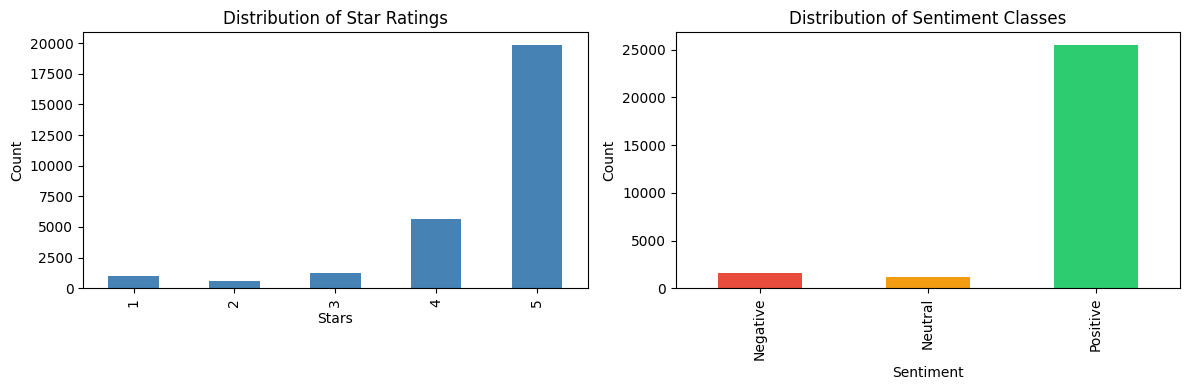


Sentiment class balance:
sentiment
Positive    25545
Negative     1581
Neutral      1206
Name: count, dtype: int64

Percentages:
sentiment
Positive    90.16
Negative     5.58
Neutral      4.26
Name: proportion, dtype: float64


In [13]:
# Distribution of ratings
if rating_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Raw ratings
    df[RATING_COL].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Distribution of Star Ratings')
    axes[0].set_xlabel('Stars')
    axes[0].set_ylabel('Count')
    
    # Sentiment mapping
    def map_sentiment(rating):
        if rating <= 2:
            return 'Negative'
        elif rating == 3:
            return 'Neutral'
        else:
            return 'Positive'
    
    df['sentiment'] = df[RATING_COL].apply(map_sentiment)
    
    sentiment_order = ['Negative', 'Neutral', 'Positive']
    colors = ['#e74c3c', '#f39c12', '#2ecc71']
    df['sentiment'].value_counts().reindex(sentiment_order).plot(
        kind='bar', ax=axes[1], color=colors
    )
    axes[1].set_title('Distribution of Sentiment Classes')
    axes[1].set_xlabel('Sentiment')
    axes[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    print('\nSentiment class balance:')
    print(df['sentiment'].value_counts())
    print(f'\nPercentages:')
    print((df['sentiment'].value_counts(normalize=True) * 100).round(2))

### Key question: Is the dataset imbalanced?
If Positive dominates heavily (common for Amazon reviews), we may need to handle class imbalance later.

## 7. Review Text Analysis

In [14]:
# Identify the review text column
# Common names: 'reviews.text', 'text', 'review_text'
text_candidates = [c for c in df.columns if 'text' in c.lower()]
print(f'Potential text columns: {text_candidates}')

# Also check for review title column
title_candidates = [c for c in df.columns if 'title' in c.lower()]
print(f'Potential title columns: {title_candidates}')

Potential text columns: ['reviews.text']
Potential title columns: ['reviews.title']


In [15]:
# SET THE TEXT COLUMN NAME HERE (update after seeing output above)
TEXT_COL = text_candidates[0] if text_candidates else 'reviews.text'  # adjust if needed

print(f'Using text column: {TEXT_COL}')
print(f'\nNull texts: {df[TEXT_COL].isnull().sum()}')
print(f'Empty texts: {(df[TEXT_COL].str.strip() == "").sum() if df[TEXT_COL].dtype == "object" else "N/A"}')

# Sample reviews
print('\n--- Sample Reviews ---')
for i, row in df.dropna(subset=[TEXT_COL]).head(3).iterrows():
    rating_val = row[RATING_COL] if rating_col else 'N/A'
    print(f'\nRating: {rating_val}')
    print(f'Text: {str(row[TEXT_COL])[:300]}...')
    print('-' * 50)

Using text column: reviews.text

Null texts: 0
Empty texts: N/A

--- Sample Reviews ---

Rating: 3
Text: I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work....
--------------------------------------------------

Rating: 4
Text: Bulk is always the less expensive way to go for products like these...
--------------------------------------------------

Rating: 5
Text: Well they are not Duracell but for the price i am happy....
--------------------------------------------------


In [16]:
# Review length analysis
df['review_length'] = df[TEXT_COL].astype(str).str.len()
df['review_word_count'] = df[TEXT_COL].astype(str).str.split().str.len()

print('Review Length (characters):')
print(df['review_length'].describe().round(0))

print('\nReview Word Count:')
print(df['review_word_count'].describe().round(0))

Review Length (characters):
count    28332.0
mean       138.0
std        200.0
min          1.0
25%         54.0
50%         87.0
75%        162.0
max       8351.0
Name: review_length, dtype: float64

Review Word Count:
count    28332.0
mean        26.0
std         37.0
min          1.0
25%         10.0
50%         17.0
75%         31.0
max       1539.0
Name: review_word_count, dtype: float64


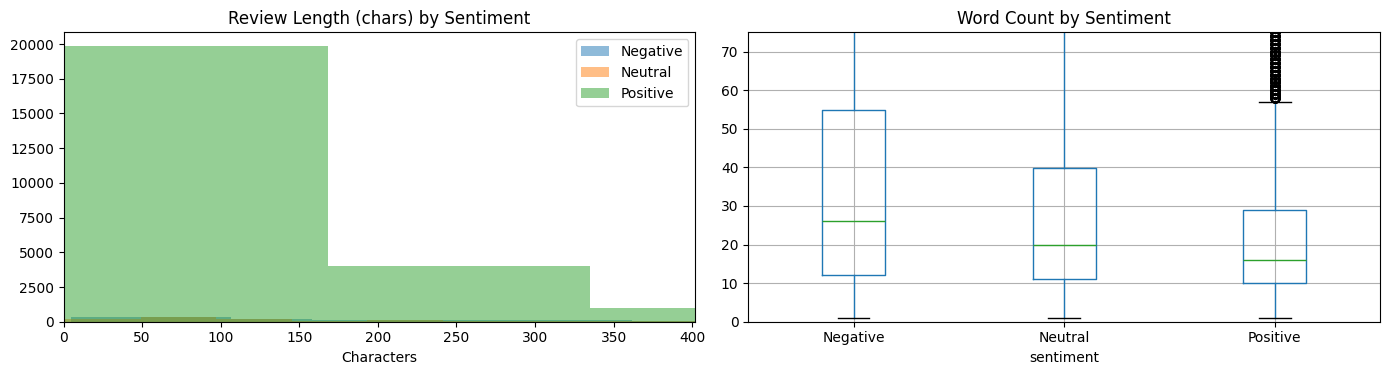

In [17]:
# Review length distribution by sentiment
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Character length distribution
for sent in ['Negative', 'Neutral', 'Positive']:
    subset = df[df['sentiment'] == sent]['review_length']
    axes[0].hist(subset, bins=50, alpha=0.5, label=sent)
axes[0].set_title('Review Length (chars) by Sentiment')
axes[0].set_xlabel('Characters')
axes[0].legend()
axes[0].set_xlim(0, df['review_length'].quantile(0.95))  # trim outliers visually

# Word count by sentiment (box plot)
df.boxplot(column='review_word_count', by='sentiment', ax=axes[1])
axes[1].set_title('Word Count by Sentiment')
axes[1].set_ylim(0, df['review_word_count'].quantile(0.95))
plt.suptitle('')  # remove auto title

plt.tight_layout()
plt.show()

## 8. Product Analysis (for Clustering)

In [18]:
# Find product-related columns
product_cols = [c for c in df.columns if any(x in c.lower() for x in ['name', 'product', 'brand', 'categor', 'manufacturer', 'asin'])]
print(f'Product-related columns: {product_cols}')

for col in product_cols:
    n_unique = df[col].nunique()
    n_null = df[col].isnull().sum()
    print(f'\n{col}: {n_unique} unique values, {n_null} nulls')
    if n_unique <= 30:
        print(df[col].value_counts())
    else:
        print(df[col].value_counts().head(10))
        print(f'  ... and {n_unique - 10} more')

Product-related columns: ['name', 'asins', 'brand', 'categories', 'primaryCategories', 'manufacturer', 'manufacturerNumber', 'reviews.username']

name: 65 unique values, 0 nulls
name
AmazonBasics AAA Performance Alkaline Batteries (36 Count)                                     8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary                 3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers              2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black          2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case                         1676
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case                         1425
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case                        1212
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black                          1024
Fire Tablet with 

In [19]:
# Category analysis - look for existing category information
cat_cols = [c for c in df.columns if 'categor' in c.lower()]
if cat_cols:
    CAT_COL = cat_cols[0]
    print(f'Category column: {CAT_COL}')
    print(f'\nSample values:')
    print(df[CAT_COL].value_counts().head(20))
else:
    print('No category column found. Will need to cluster based on product names/descriptions.')

Category column: categories

Sample values:
categories
AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           834

In [20]:
# Product name analysis
name_cols = [c for c in df.columns if 'name' in c.lower()]
if name_cols:
    NAME_COL = name_cols[0]
    print(f'Product name column: {NAME_COL}')
    print(f'Unique products: {df[NAME_COL].nunique()}')
    print(f'\nTop 15 products by review count:')
    print(df[NAME_COL].value_counts().head(15))

Product name column: name
Unique products: 65

Top 15 products by review count:
name
AmazonBasics AAA Performance Alkaline Batteries (36 Count)                                                                                      8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary                                                                  3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers                                                               2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black                                                           2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case                                                                          1676
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case                                                                          1425
Fire Kids Edition Tab

Reviews per product stats:
count      65.0
mean      436.0
std      1208.0
min         1.0
25%         5.0
50%        21.0
75%       160.0
max      8343.0
Name: count, dtype: float64


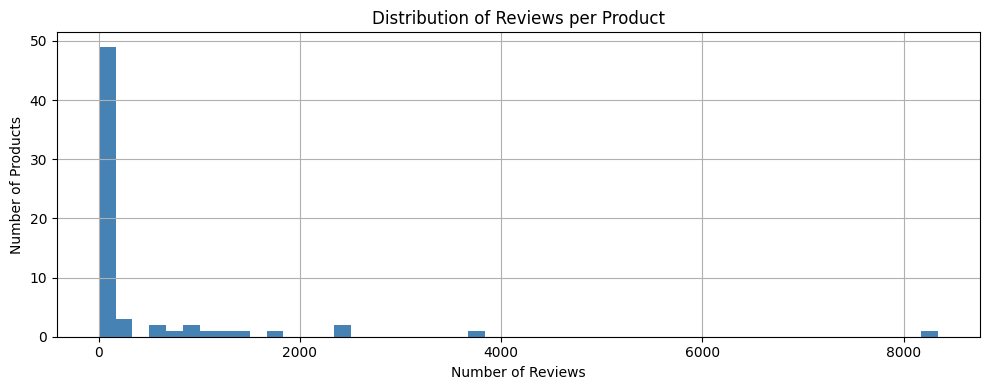

In [21]:
# Reviews per product distribution
if name_cols:
    reviews_per_product = df[NAME_COL].value_counts()
    print(f'Reviews per product stats:')
    print(reviews_per_product.describe().round(0))
    
    fig, ax = plt.subplots(figsize=(10, 4))
    reviews_per_product.hist(bins=50, ax=ax, color='steelblue')
    ax.set_title('Distribution of Reviews per Product')
    ax.set_xlabel('Number of Reviews')
    ax.set_ylabel('Number of Products')
    plt.tight_layout()
    plt.show()

## 9. Rating Distribution per Product

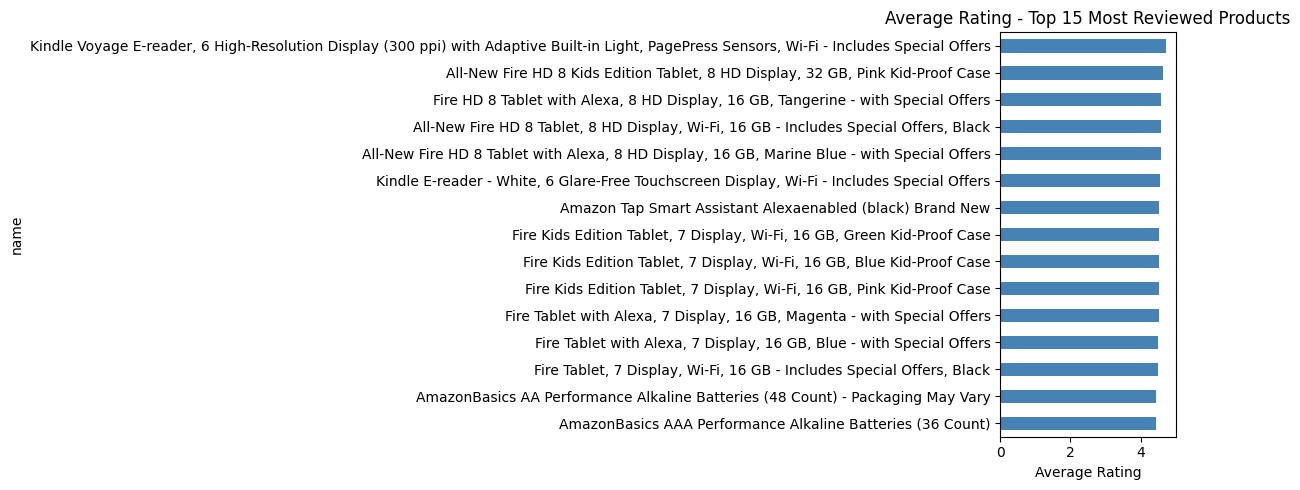

In [22]:
# Average rating per product (top 15 most reviewed)
if name_cols and rating_col:
    top_products = df[NAME_COL].value_counts().head(15).index
    top_df = df[df[NAME_COL].isin(top_products)]
    
    fig, ax = plt.subplots(figsize=(12, 5))
    top_df.groupby(NAME_COL)[RATING_COL].mean().sort_values().plot(
        kind='barh', ax=ax, color='steelblue'
    )
    ax.set_xlabel('Average Rating')
    ax.set_title('Average Rating - Top 15 Most Reviewed Products')
    ax.set_xlim(0, 5)
    plt.tight_layout()
    plt.show()

## 10. Other Useful Columns

In [23]:
# Check for other potentially useful columns
# Common in this dataset: didPurchase, doRecommend, numHelpful, date columns

interesting_cols = [c for c in df.columns if any(x in c.lower() for x in 
    ['purchase', 'recommend', 'helpful', 'date', 'user', 'source'])]

print('Other interesting columns:')
for col in interesting_cols:
    n_unique = df[col].nunique()
    n_null = df[col].isnull().sum()
    print(f'\n{col}: {n_unique} unique, {n_null} nulls ({n_null/len(df)*100:.1f}%)')
    if n_unique <= 10:
        print(df[col].value_counts())

Other interesting columns:

dateAdded: 55 unique, 0 nulls (0.0%)

dateUpdated: 52 unique, 0 nulls (0.0%)

reviews.date: 1313 unique, 0 nulls (0.0%)

reviews.dateSeen: 606 unique, 0 nulls (0.0%)

reviews.didPurchase: 2 unique, 28323 nulls (100.0%)
reviews.didPurchase
True     8
False    1
Name: count, dtype: int64

reviews.doRecommend: 2 unique, 12246 nulls (43.2%)
reviews.doRecommend
True     15353
False      733
Name: count, dtype: int64

reviews.numHelpful: 61 unique, 12217 nulls (43.1%)

reviews.sourceURLs: 9906 unique, 0 nulls (0.0%)

reviews.username: 16268 unique, 5 nulls (0.0%)

sourceURLs: 65 unique, 0 nulls (0.0%)


## 11. Date Analysis

In [24]:
# Find and parse date columns
date_cols = [c for c in df.columns if 'date' in c.lower()]
print(f'Date columns: {date_cols}')

for col in date_cols:
    try:
        df[col + '_parsed'] = pd.to_datetime(df[col], errors='coerce')
        print(f'\n{col}:')
        print(f'  Range: {df[col + "_parsed"].min()} to {df[col + "_parsed"].max()}')
        print(f'  Nulls after parse: {df[col + "_parsed"].isnull().sum()}')
    except Exception as e:
        print(f'\n{col}: Could not parse - {e}')

Date columns: ['dateAdded', 'dateUpdated', 'reviews.date', 'reviews.dateSeen']

dateAdded:
  Range: 2014-08-28 19:31:47+00:00 to 2018-11-24 02:11:25+00:00
  Nulls after parse: 0

dateUpdated:
  Range: 2019-02-23 02:49:38+00:00 to 2019-04-25 09:08:16+00:00
  Nulls after parse: 0

reviews.date:
  Range: 2009-02-26 00:00:00+00:00 to 2019-03-25 00:00:00+00:00
  Nulls after parse: 62

reviews.dateSeen:
  Range: 2014-08-28 00:00:00+00:00 to 2019-04-18 00:00:00+00:00
  Nulls after parse: 14048


## 12. Correlation Analysis (Numeric Features)

Numeric columns: ['reviews.id', 'reviews.numHelpful', 'reviews.rating', 'review_length', 'review_word_count']


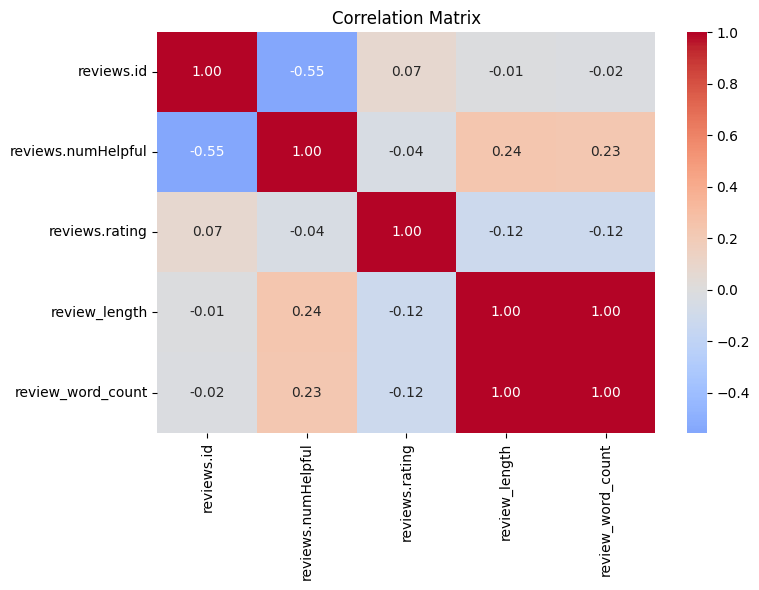

In [25]:
# Correlation between numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f'Numeric columns: {numeric_cols}')

if len(numeric_cols) > 1:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0, ax=ax, fmt='.2f')
    ax.set_title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

## 13. Summary & Key Findings

### Dataset Overview
- **Size:** 28,332 rows, 24 columns
- **Content:** Consumer reviews of Amazon-branded products (batteries, tablets, e-readers, smart speakers)
- **Time span:** Reviews from 2009 to 2019

### Key Columns Identified
- **Review text:** `reviews.text` — 0 nulls, median 17 words (short reviews)
- **Rating:** `reviews.rating` — 0 nulls, integer 1-5, mean 4.51
- **Product name:** `name` — 65 unique products, 0 nulls
- **Categories:** `primaryCategories` (9 values, clean) and `categories` (multi-label, rich but messy)
- **Review title:** `reviews.title` — appears to be truncated version of review text

### Data Quality
- **Missing values:** Core columns (text, rating, name, categories) have zero nulls. `reviews.didPurchase` (99.97% null) and `reviews.id` (99.86% null) are useless. `reviews.doRecommend` and `reviews.numHelpful` are ~43% null.
- **Full row duplicates:** 0
- **Duplicate review texts:** 10,164 (35.87%) — these are legitimate short generic reviews ('good', 'great', 'ok') posted across different products. Decision: **keep them**.
- **Empty reviews:** 0

### Sentiment Class Balance (Target Variable)
- **Positive (4-5 stars):** 25,545 reviews (90.2%)
- **Negative (1-2 stars):** 1,581 reviews (5.6%)
- **Neutral (3 stars):** 1,206 reviews (4.3%)
- **Heavily imbalanced** — will need class weights, undersampling, or stratified splits

### Product & Category Analysis
- **65 unique products**, all Amazon-branded
- Top products: AmazonBasics batteries (12,071 reviews), Fire tablets, Kids tablets, Kindle e-readers, Amazon Echo/Tap
- Reviews per product: highly skewed (median 21, max 8,343). Bottom 25% have 5 or fewer reviews.
- **Natural product clusters visible:** Batteries, Fire Tablets, Kids Tablets, E-Readers, Smart Speakers
- `primaryCategories` has 9 values but dominated by Electronics (49.4%) and Health & Beauty (42.6%)

### Review Text Characteristics
- Median length: 87 characters / 17 words — reviews are quite short
- Many single-word reviews ('good', 'great') — may be hard for models to classify
- Max review: 8,351 chars / 1,539 words (outliers)

### Columns to Drop
- `reviews.didPurchase` — 99.97% null
- `reviews.id` — 99.86% null
- `imageURLs` — not needed for NLP
- `keys` — internal identifiers
- `sourceURLs`, `reviews.sourceURLs` — source links, not needed
- `manufacturerNumber` — not useful
- `dateAdded`, `dateUpdated`, `reviews.dateSeen` — metadata dates, not needed

### Columns to Keep
- `reviews.text` — main input for classification and summarization
- `reviews.rating` — target for sentiment mapping
- `name` — product identification, needed for clustering and summarization
- `categories` — rich multi-label categories for clustering
- `primaryCategories` — clean single category for clustering baseline
- `brand`, `manufacturer` — product metadata
- `reviews.date` — review date (optional, for temporal analysis)
- `reviews.title` — supplementary text (optional)
- `reviews.doRecommend` — binary recommendation (optional, 43% null)
- `reviews.numHelpful` — helpfulness score (optional, 43% null, useful for identifying quality reviews)

### Decisions Made
- [x] **Missing review texts:** No action needed — 0 nulls
- [x] **Duplicate texts:** Keep — they are legitimate short reviews across different products
- [ ] **Class imbalance:** Use class weights in transformer fine-tuning, or undersample Positive class
- [ ] **Clustering approach:** Use product names + `categories` column to build 4-6 meta-categories (Batteries, Fire Tablets, Kids Tablets, E-Readers, Smart Speakers)
- [ ] **Short reviews:** Monitor model performance on very short texts (<5 words)

## 14. Column Selection for Next Steps

Based on exploration, select columns relevant for each task.

In [26]:
# Columns to drop
cols_drop = ['reviews.didPurchase', 'reviews.id', 'imageURLs', 'keys', 
             'sourceURLs', 'reviews.sourceURLs', 'manufacturerNumber',
             'dateAdded', 'dateUpdated', 'reviews.dateSeen']
df_clean = df.drop(columns=[c for c in cols_drop if c in df.columns])
print(f'Dropped {len(cols_drop)} columns. Remaining: {df_clean.shape[1]} columns')
print(f'Columns kept: {list(df_clean.columns)}')

# Add sentiment column
def map_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df_clean['sentiment'] = df_clean['reviews.rating'].apply(map_sentiment)

# Save cleaned data for next notebooks
df_clean.to_csv('data_cleaned.csv', index=False)
print(f'\nSaved cleaned dataset: {df_clean.shape[0]:,} rows, {df_clean.shape[1]} columns')
print('File: data_cleaned.csv')

Dropped 10 columns. Remaining: 21 columns
Columns kept: ['id', 'name', 'asins', 'brand', 'categories', 'primaryCategories', 'manufacturer', 'reviews.date', 'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.username', 'sentiment', 'review_length', 'review_word_count', 'dateAdded_parsed', 'dateUpdated_parsed', 'reviews.date_parsed', 'reviews.dateSeen_parsed']

Saved cleaned dataset: 28,332 rows, 21 columns
File: data_cleaned.csv
